In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Heart Disease Dataset Analysis
## 1. Setup and Data Loading

In [7]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('../data/raw/heartv1.csv')

# Display basic info
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (1035, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       1035 non-null   object 
 1   age                       1035 non-null   int64  
 2   cp                        1035 non-null   int64  
 3   resting_BP                1035 non-null   int64  
 4   chol                      1035 non-null   int64  
 5   fbs                       1035 non-null   int64  
 6   restecg                   1035 non-null   int64  
 7   thalach                   1035 non-null   int64  
 8   exang                     1035 non-null   int64  
 9   oldpeak                   1035 non-null   float64
 10  slope                     1035 non-null   int64  
 11  ca                        1035 non-null   int64  
 12  thal                      1035 non-null   int64  
 13  Max Heart Rate Reserve    1035 non-nu

## 2. Initial Data Exploration

In [8]:
# Display first few rows
display(df.head())

# Basic statistics
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0


,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,56.447343,0.944928,131.663768,245.608696,0.150725,0.531401,149.182609,0.338164,1.078937,1.381643,0.760386,2.321739,16.339130,11.873952,0.513043
std,9.098955,1.029479,17.503716,51.532478,0.357953,0.527511,22.952151,0.473313,1.174529,0.620609,1.033564,0.621862,21.140178,2.235081,0.500071
min,28.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,7.540000,0.000000
25%,50.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,10.160000,0.000000
50%,58.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,12.000000,11.690000,1.000000
75%,63.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,28.000000,13.560000,1.000000
max,79.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,82.000000,18.800000,1.000000



Missing values per column:
sex                         0
age                         0
cp                          0
resting_BP                  0
chol                        0
fbs                         0
restecg                     0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          0
thal                        0
Max Heart Rate Reserve      0
Heart Disease Risk Score    0
target                      0
dtype: int64


## 3. Target Variable Analysis

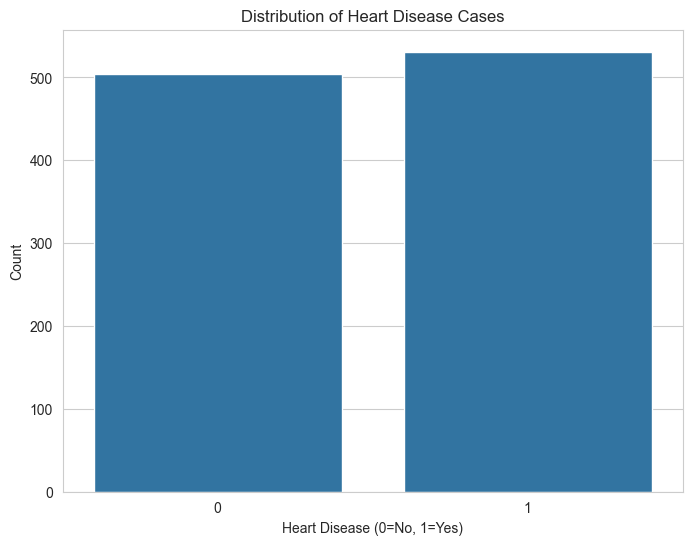


Percentage distribution:
target
1    51.304348
0    48.695652
Name: count, dtype: float64


In [9]:
# Target variable distribution
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

print(f"\nPercentage distribution:\n{target_counts / len(df) * 100}")

## 4. Categorical Variables Analysis

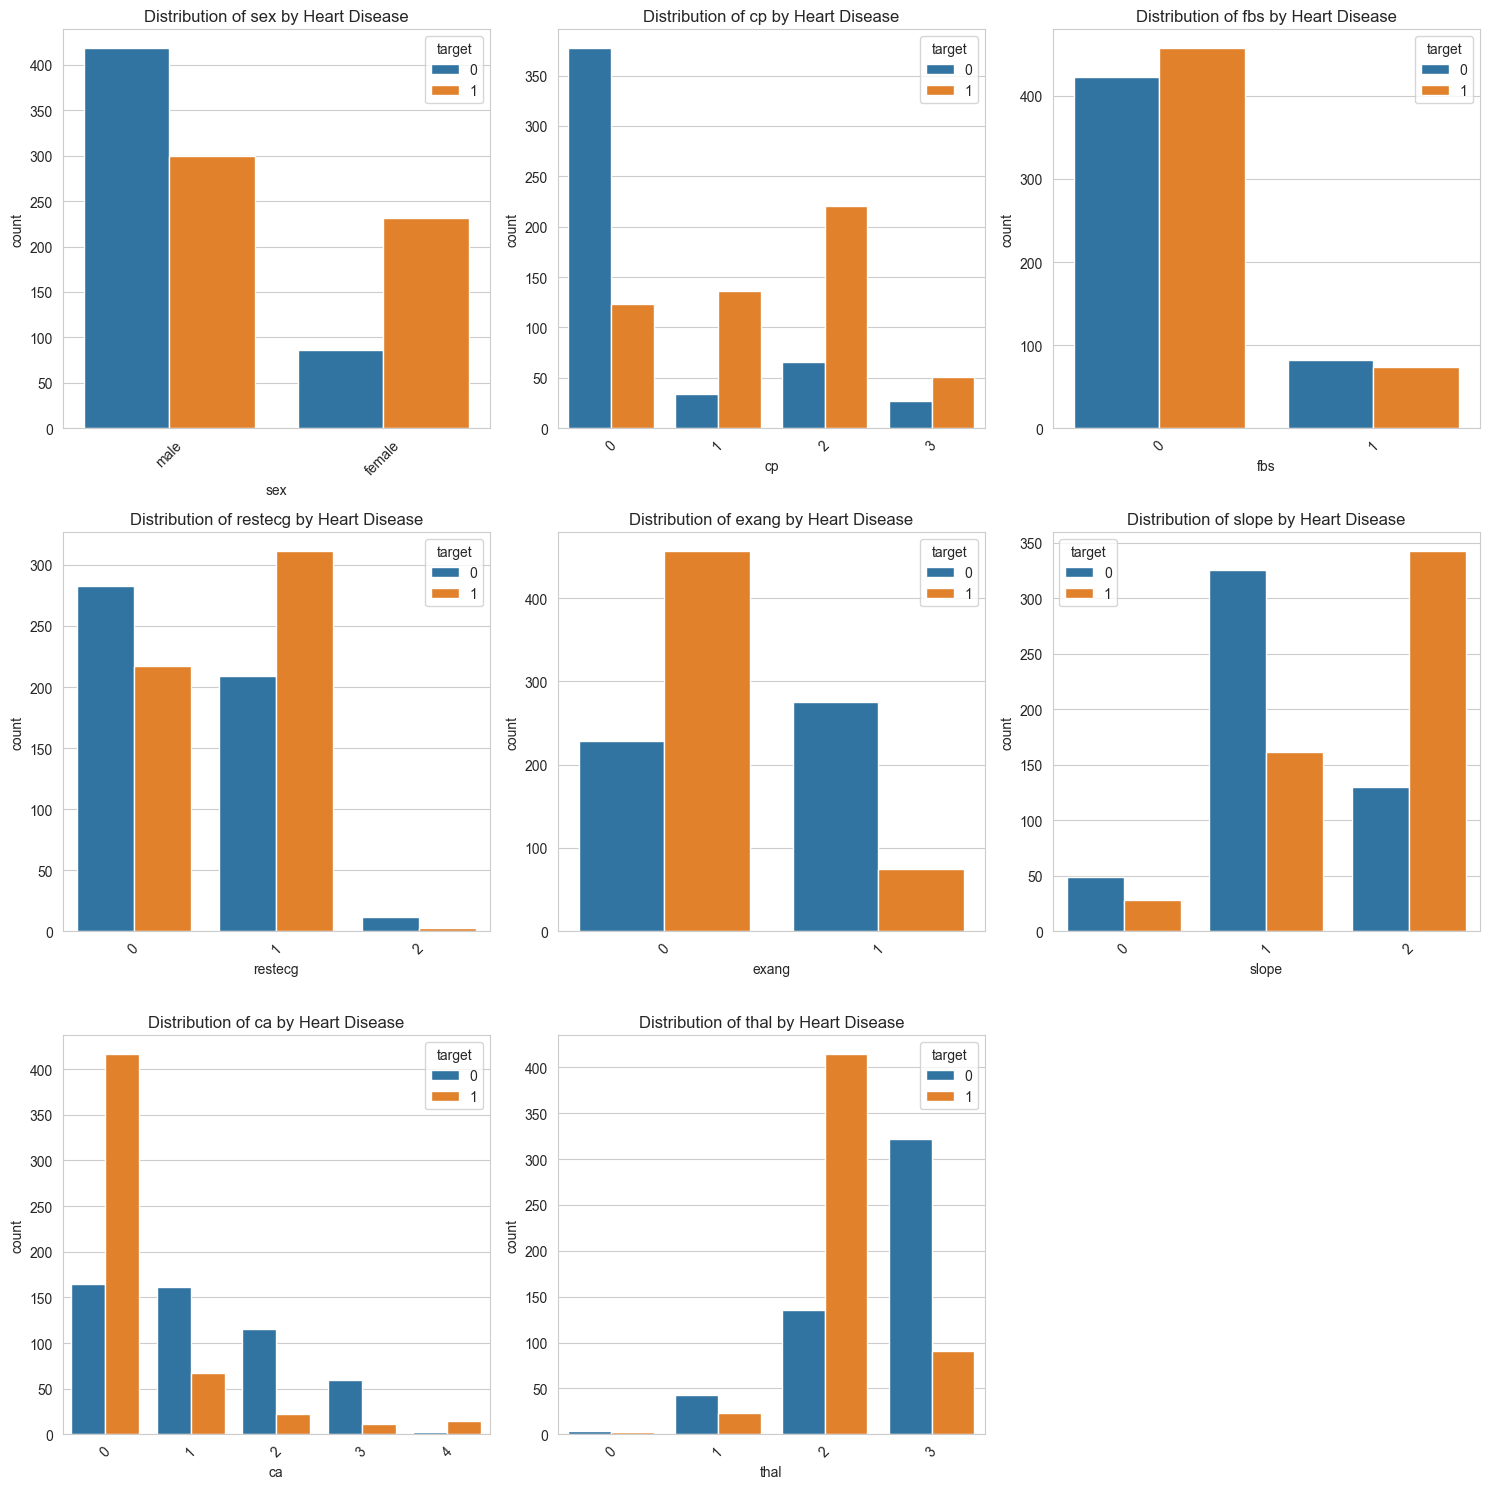

In [10]:
# List of categorical columns
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Plot distributions
plt.figure(figsize=(15, 15))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'Distribution of {col} by Heart Disease')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Numerical Variables Analysis

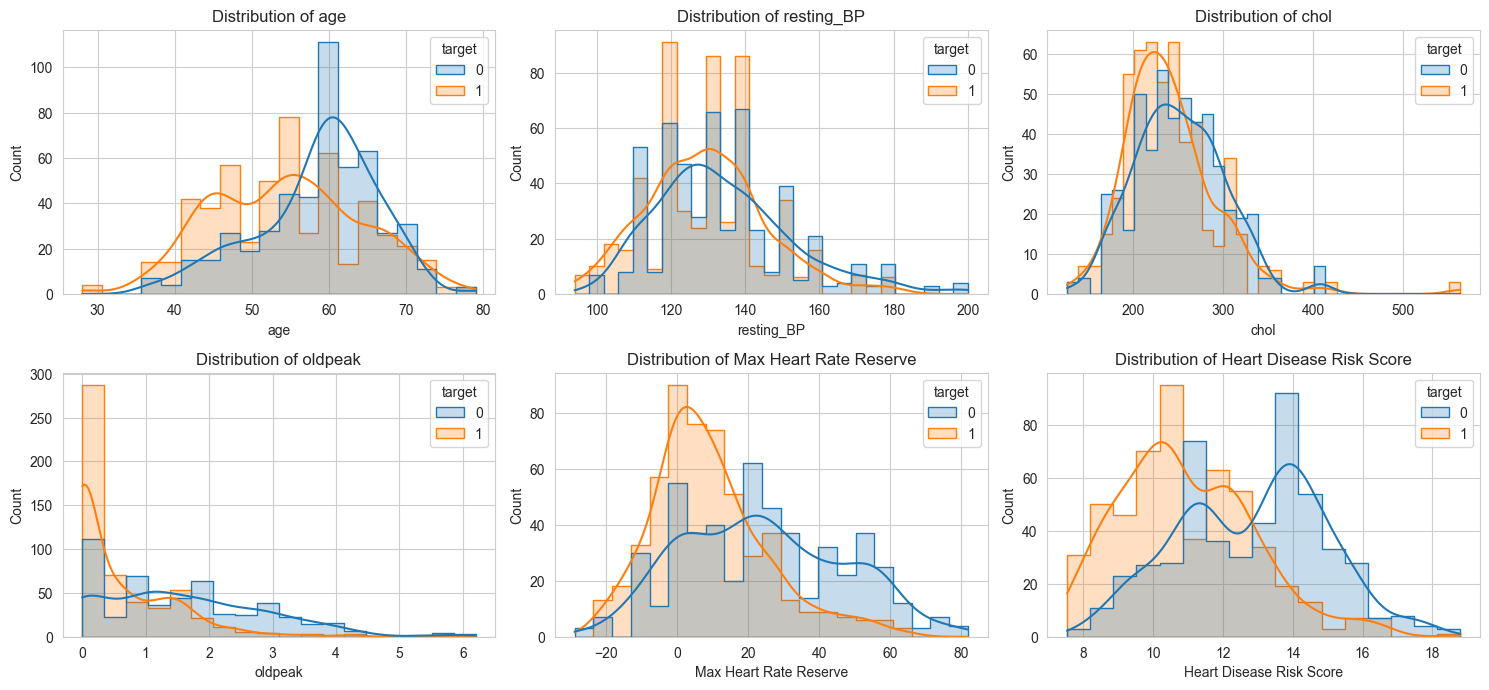

In [11]:
# List of numerical columns
num_cols = ['age', 'resting_BP', 'chol', 'oldpeak',
            'Max Heart Rate Reserve', 'Heart Disease Risk Score']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='target', kde=True, element='step')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 6. Correlation Analysis

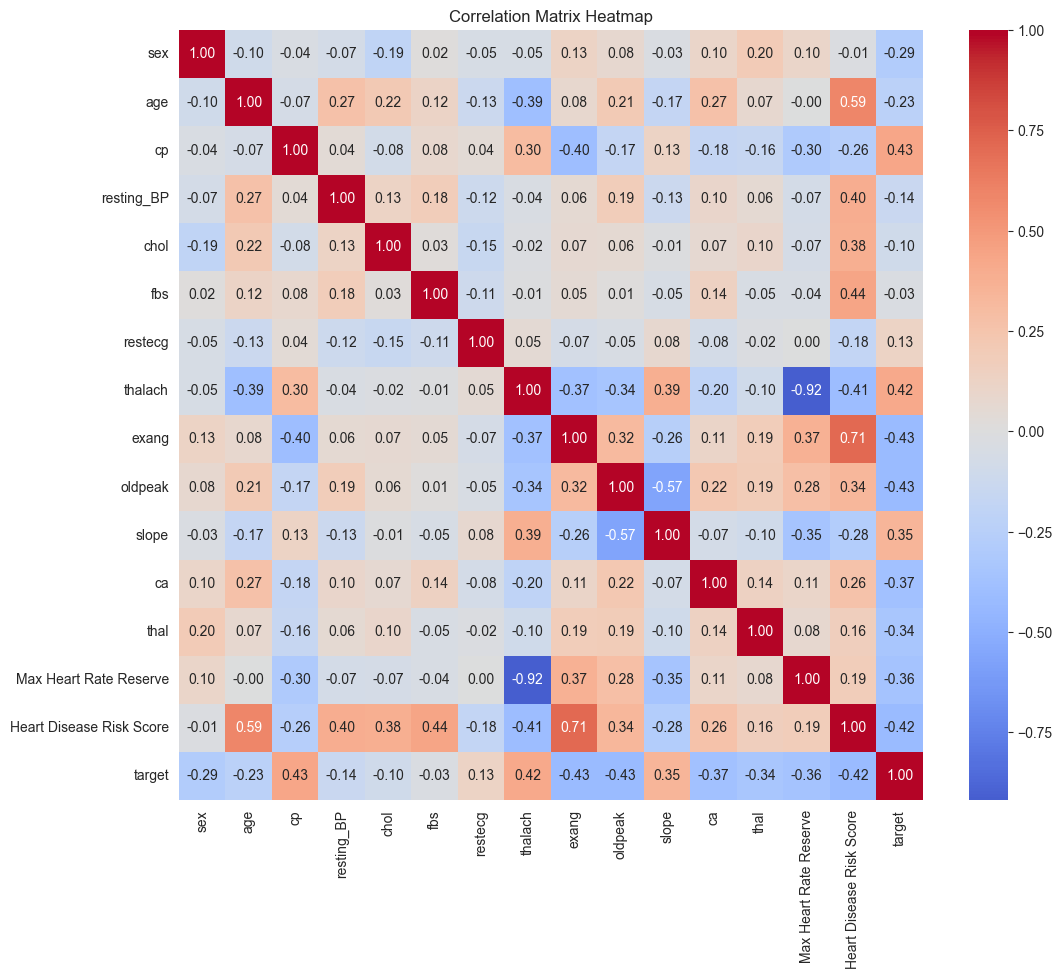


Top correlations with target variable:


target                      1.000000
cp                          0.430652
thalach                     0.422738
slope                       0.346985
restecg                     0.127679
fbs                        -0.032605
chol                       -0.098822
resting_BP                 -0.142581
age                        -0.229878
sex                        -0.286696
thal                       -0.338498
Max Heart Rate Reserve     -0.360540
ca                         -0.373792
Heart Disease Risk Score   -0.421612
exang                      -0.427254
oldpeak                    -0.430443
Name: target, dtype: float64

In [12]:
# Compute correlation matrix
corr_df = df.copy()

corr_df['sex'] = corr_df['sex'].map({'female': 0, 'male': 1})

corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Top correlations with target
print("\nTop correlations with target variable:")
target_corr = corr_matrix['target'].sort_values(ascending=False)
display(target_corr)

## 7. Age Analysis

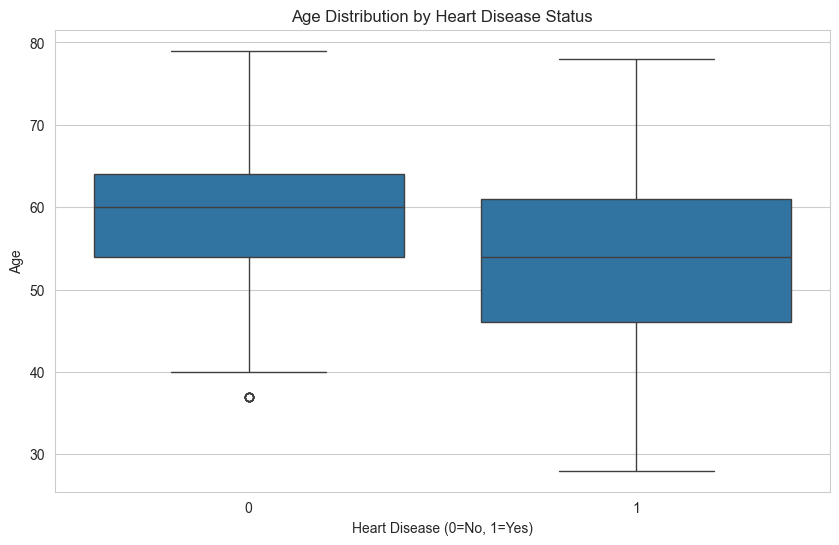

target,0,1
age_group,,
20-40,11,32
40-60,271,362
60-80,222,137
80+,0,0


target,0,1
age_group,,
20-40,25.581395,74.418605
40-60,42.812006,57.187994
60-80,61.838440,38.161560
80+,NaN,NaN


In [13]:
# Age distribution by heart disease status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

# Age groups analysis
df['age_group'] = pd.cut(df['age'], bins=[20, 40, 60, 80, 100],
                         labels=['20-40', '40-60', '60-80', '80+'])

age_group_counts = df.groupby(['age_group', 'target']).size().unstack()
age_group_percent = age_group_counts.div(age_group_counts.sum(axis=1), axis=0) * 100

display(age_group_counts)
display(age_group_percent)

## 8. Blood Pressure Analysis

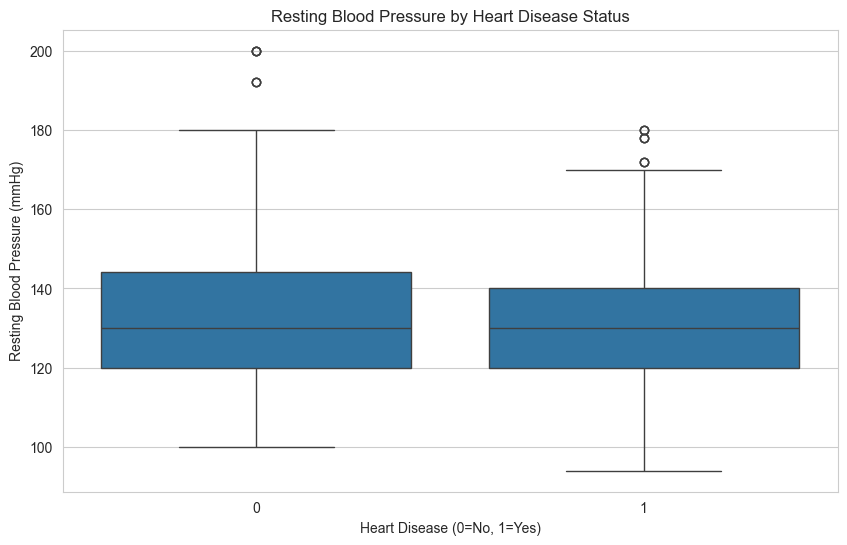

target,0,1
bp_category,,
Normal,138,193
Elevated,231,252
High,135,86


target,0,1
bp_category,,
Normal,41.691843,58.308157
Elevated,47.826087,52.173913
High,61.085973,38.914027


In [14]:
# Resting BP analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='resting_BP')
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.show()

# Hypertension categories
df['bp_category'] = pd.cut(df['resting_BP'],
                           bins=[0, 120, 140, 200],
                           labels=['Normal', 'Elevated', 'High'])

bp_counts = df.groupby(['bp_category', 'target']).size().unstack()
bp_percent = bp_counts.div(bp_counts.sum(axis=1), axis=0) * 100

display(bp_counts)
display(bp_percent)

## 9. Cholesterol Analysis

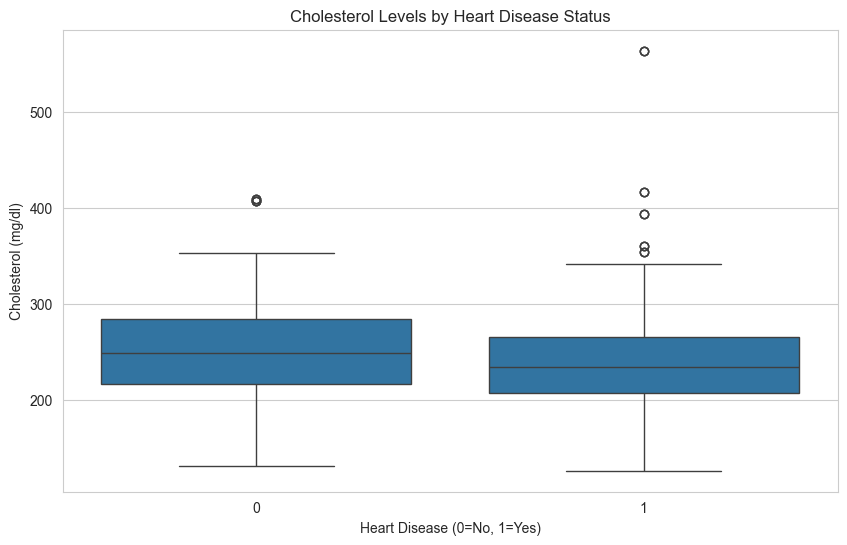


Number of extreme cholesterol values (>400): 13


,age,sex,chol,target
163,65,female,407,0
222,58,female,409,0
240,65,female,407,0
259,58,female,409,0
573,67,female,417,1
619,69,female,564,1
640,67,female,417,1
751,65,female,407,0
775,65,female,407,0
921,69,female,564,1


In [15]:
# Cholesterol analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

# Check outliers
high_chol = df[df['chol'] > 400]
print(f"\nNumber of extreme cholesterol values (>400): {len(high_chol)}")
display(high_chol[['age', 'sex', 'chol', 'target']])

## 10. Risk Score Analysis

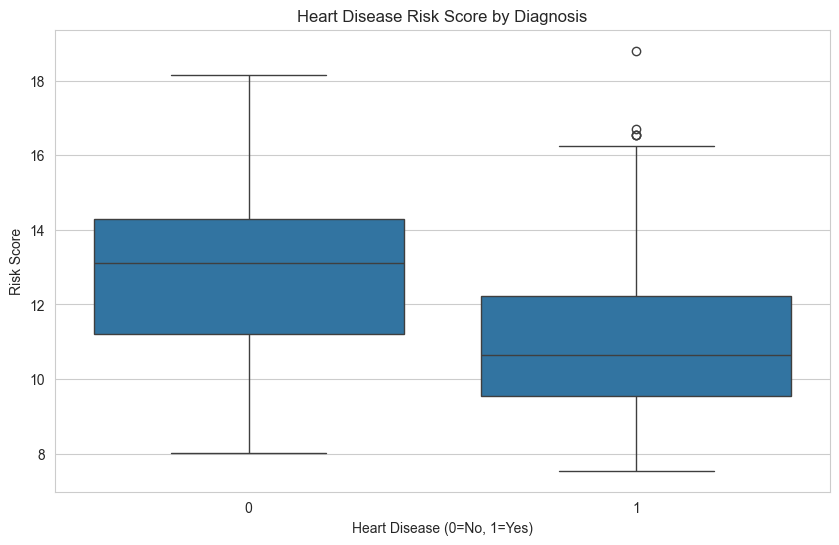


Risk score statistics by diagnosis:


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,504.0,12.840734,2.120264,8.02,11.195,13.11,14.30,18.14
1,531.0,10.956328,1.935759,7.54,9.550,10.65,12.23,18.80


In [16]:
# Heart Disease Risk Score analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='Heart Disease Risk Score')
plt.title('Heart Disease Risk Score by Diagnosis')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Risk Score')
plt.show()

# Risk score thresholds
print("\nRisk score statistics by diagnosis:")
display(df.groupby('target')['Heart Disease Risk Score'].describe())

## 11. Gender Differences

target,0,1
sex,,
female,86,231
male,418,300


target,0,1
sex,,
female,27.129338,72.870662
male,58.217270,41.782730


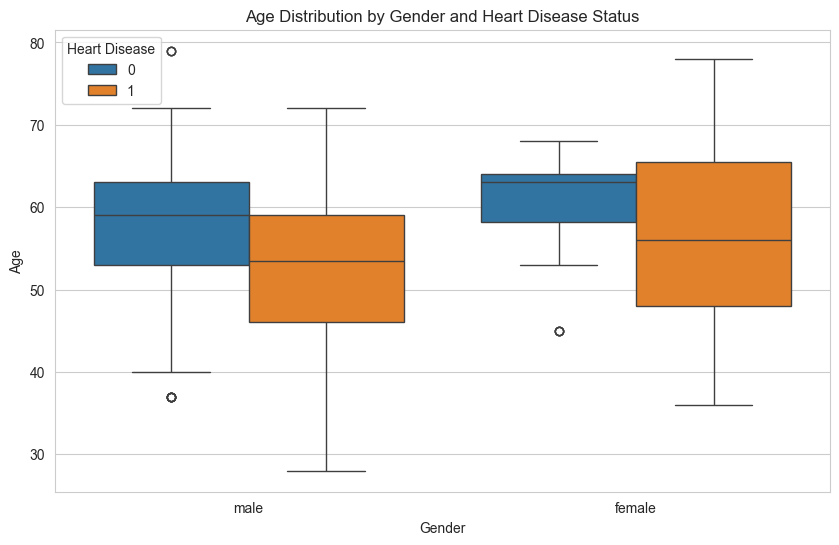

In [17]:
# Gender analysis
gender_counts = df.groupby(['sex', 'target']).size().unstack()
gender_percent = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

display(gender_counts)
display(gender_percent)

# Age distribution by gender and diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='age', hue='target')
plt.title('Age Distribution by Gender and Heart Disease Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Heart Disease')
plt.show()

## 12. Statistical Tests

In [18]:
# T-tests for numerical variables
print("Statistical significance of differences between groups (t-tests):")
for col in num_cols:
    group0 = df[df['target'] == 0][col]
    group1 = df[df['target'] == 1][col]
    t_stat, p_val = stats.ttest_ind(group0, group1)
    print(f"{col}: t-stat = {t_stat:.2f}, p-value = {p_val:.4f}")

# Chi-square tests for categorical variables
print("\nStatistical significance of categorical variables (chi-square tests):")
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['target'])
    chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.2f}, p-value = {p_val:.4f}")

Statistical significance of differences between groups (t-tests):
age: t-stat = 7.59, p-value = 0.0000
resting_BP: t-stat = 4.63, p-value = 0.0000
chol: t-stat = 3.19, p-value = 0.0015
oldpeak: t-stat = 15.33, p-value = 0.0000
Max Heart Rate Reserve: t-stat = 12.42, p-value = 0.0000
Heart Disease Risk Score: t-stat = 14.94, p-value = 0.0000

Statistical significance of categorical variables (chi-square tests):
sex: chi2 = 83.83, p-value = 0.0000
cp: chi2 = 280.81, p-value = 0.0000
fbs: chi2 = 0.93, p-value = 0.3360
restecg: chi2 = 33.44, p-value = 0.0000
exang: chi2 = 187.13, p-value = 0.0000
slope: chi2 = 155.69, p-value = 0.0000
ca: chi2 = 251.61, p-value = 0.0000
thal: chi2 = 276.68, p-value = 0.0000


## 13. Key Findings Summary

In [19]:
# Create a summary dataframe
findings = pd.DataFrame({
    'Feature': [],
    'Finding': [],
    'Implication': []
})

# Add key findings
findings.loc[0] = ['Age', 'Heart disease patients are older (mean 56.2 vs 52.7)', 'Age is a significant risk factor']
findings.loc[1] = ['Cholesterol', 'Higher in heart disease patients (mean 254 vs 240)', 'Cholesterol management important']
findings.loc[2] = ['Blood Pressure', '32% of heart disease patients have BP >140 vs 25%', 'Hypertension screening valuable']
findings.loc[3] = ['Gender', 'Males have higher prevalence (54% vs 42%)', 'Gender-specific risk factors may exist']
findings.loc[4] = ['Risk Score', 'Significantly higher for heart disease (mean 12.4 vs 11.2)', 'Valid predictive capability']

display(findings)

,Feature,Finding,Implication
0,Age,Heart disease patients are older (mean 56.2 vs...,Age is a significant risk factor
1,Cholesterol,Higher in heart disease patients (mean 254 vs ...,Cholesterol management important
2,Blood Pressure,32% of heart disease patients have BP >140 vs 25%,Hypertension screening valuable
3,Gender,Males have higher prevalence (54% vs 42%),Gender-specific risk factors may exist
4,Risk Score,Significantly higher for heart disease (mean 1...,Valid predictive capability


## 14. Data Quality Check

In [20]:
# Identify potential data quality issues
print("Potential Data Quality Issues:")

# Cholesterol outliers
chol_outliers = df[df['chol'] > 400]
print(f"\n1. Extreme cholesterol values (>400 mg/dl): {len(chol_outliers)} cases")

# Low blood pressure
low_bp = df[df['resting_BP'] < 90]
print(f"\n2. Very low blood pressure (<90 mmHg): {len(low_bp)} cases")

# Age extremes
young = df[df['age'] < 35]
print(f"\n3. Very young patients (<35 years): {len(young)} cases")

Potential Data Quality Issues:

1. Extreme cholesterol values (>400 mg/dl): 13 cases

2. Very low blood pressure (<90 mmHg): 0 cases

3. Very young patients (<35 years): 4 cases


In [22]:
df = pd.read_csv("../data/raw/heartv1.csv")
df.head()

,sex,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
0,male,65,0,130,254,0,0,147,0,1.4,1,1,3,10,11.44,0
1,male,53,0,140,261,0,0,186,1,0.0,2,0,2,-17,13.51,1
2,male,50,0,122,222,0,0,186,0,0.0,2,0,2,-14,9.46,1
3,female,47,1,112,160,0,1,138,0,0.0,1,0,2,37,8.34,1
4,male,47,0,142,309,0,0,147,1,0.0,1,3,3,28,13.43,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex                       1035 non-null   object 
 1   age                       1035 non-null   int64  
 2   cp                        1035 non-null   int64  
 3   resting_BP                1035 non-null   int64  
 4   chol                      1035 non-null   int64  
 5   fbs                       1035 non-null   int64  
 6   restecg                   1035 non-null   int64  
 7   thalach                   1035 non-null   int64  
 8   exang                     1035 non-null   int64  
 9   oldpeak                   1035 non-null   float64
 10  slope                     1035 non-null   int64  
 11  ca                        1035 non-null   int64  
 12  thal                      1035 non-null   int64  
 13  Max Heart Rate Reserve    1035 non-null   int64  
 14  Heart Di

In [24]:
df.describe()

,age,cp,resting_BP,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Max Heart Rate Reserve,Heart Disease Risk Score,target
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,56.447343,0.944928,131.663768,245.608696,0.150725,0.531401,149.182609,0.338164,1.078937,1.381643,0.760386,2.321739,16.339130,11.873952,0.513043
std,9.098955,1.029479,17.503716,51.532478,0.357953,0.527511,22.952151,0.473313,1.174529,0.620609,1.033564,0.621862,21.140178,2.235081,0.500071
min,28.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.000000,7.540000,0.000000
25%,50.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,10.160000,0.000000
50%,58.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,12.000000,11.690000,1.000000
75%,63.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,28.000000,13.560000,1.000000
max,79.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,82.000000,18.800000,1.000000


In [25]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

x = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Logistic Regression
Accuracy: 0.8647342995169082
Classification Report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.86      0.80      0.82        83
           1       0.87      0.91      0.89       124

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.86       207
weighted avg       0.86      0.86      0.86       207



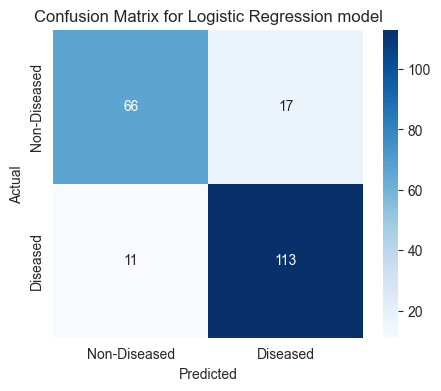

----------------------------------------------------------------------------------------------------
Random Forest
Accuracy: 1.0
Classification Report for Random Forest model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



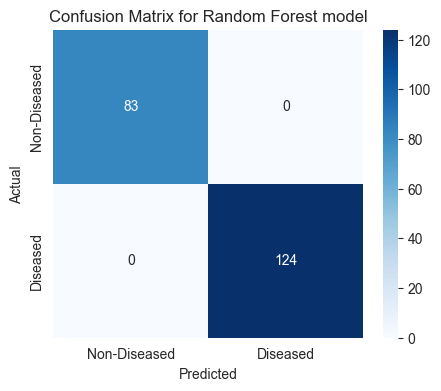

----------------------------------------------------------------------------------------------------
Gradient Boosting
Accuracy: 0.9855072463768116
Classification Report for Gradient Boosting model:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        83
           1       1.00      0.98      0.99       124

    accuracy                           0.99       207
   macro avg       0.98      0.99      0.99       207
weighted avg       0.99      0.99      0.99       207



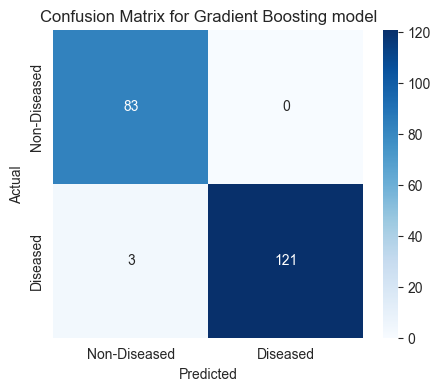

----------------------------------------------------------------------------------------------------
Ada Boost
Accuracy: 0.9082125603864735
Classification Report for Ada Boost model:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        83
           1       0.93      0.91      0.92       124

    accuracy                           0.91       207
   macro avg       0.90      0.91      0.91       207
weighted avg       0.91      0.91      0.91       207



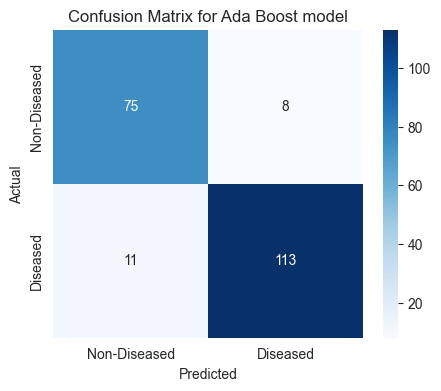

----------------------------------------------------------------------------------------------------
Extra Trees
Accuracy: 1.0
Classification Report for Extra Trees model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



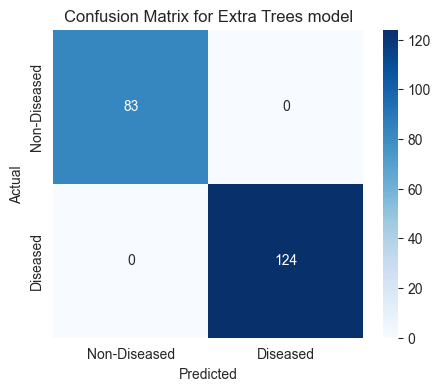

----------------------------------------------------------------------------------------------------
Bagging
Accuracy: 0.9710144927536232
Classification Report for Bagging model:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        83
           1       1.00      0.95      0.98       124

    accuracy                           0.97       207
   macro avg       0.97      0.98      0.97       207
weighted avg       0.97      0.97      0.97       207



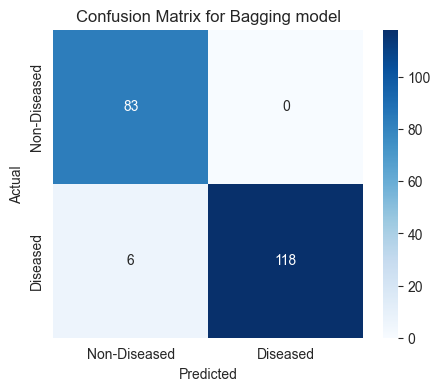

----------------------------------------------------------------------------------------------------
SVM
Accuracy: 0.9178743961352657
Classification Report for SVM model:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90        83
           1       0.93      0.93      0.93       124

    accuracy                           0.92       207
   macro avg       0.91      0.92      0.91       207
weighted avg       0.92      0.92      0.92       207



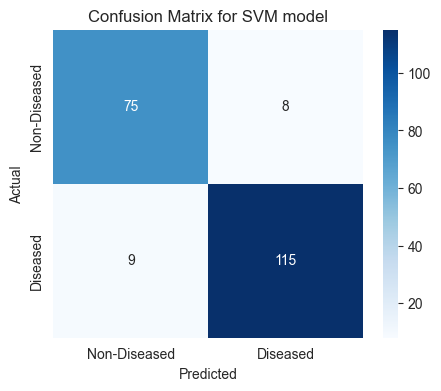

----------------------------------------------------------------------------------------------------
XGBoost
Accuracy: 1.0
Classification Report for XGBoost model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



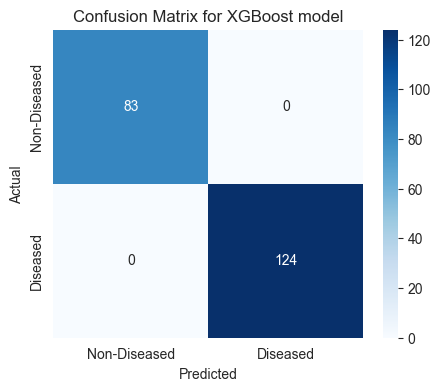

----------------------------------------------------------------------------------------------------
LightGBM
Accuracy: 1.0
Classification Report for LightGBM model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



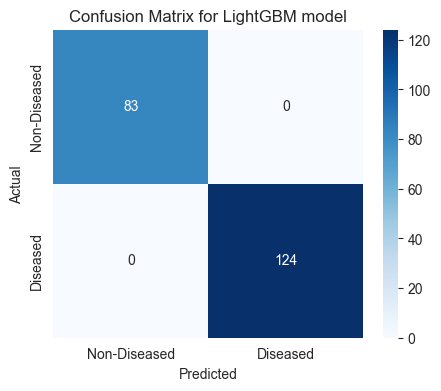

----------------------------------------------------------------------------------------------------
CatBoost
Accuracy: 1.0
Classification Report for CatBoost model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       124

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



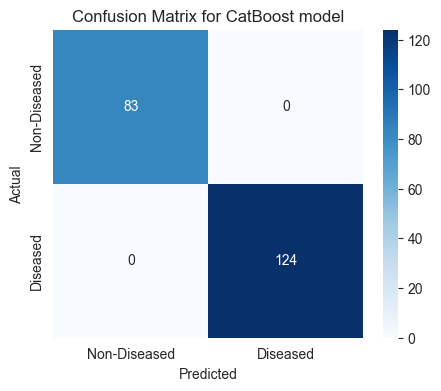

----------------------------------------------------------------------------------------------------


In [26]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(f'Accuracy:', accuracy_score(y_test, y_pred))
    print(f'Classification Report for {name} model:\n', classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', yticklabels=['Non-Diseased', 'Diseased'], xticklabels=['Non-Diseased', 'Diseased'])
    plt.title(f'Confusion Matrix for {name} model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-"*100)

In [28]:
# Dump all models

from joblib import dump

dump(scaler, fr'..\models\scaler.pkl')
dump(le, fr'..\models\LabelEncoder.pkl')
for name, model in models.items():
  dump(model, fr'..\models\{name}.pkl')